#Titanic

In [1]:
# mac475의 ipython 표준 style을 적용함
from IPython.core.display import HTML
styles = open("../styles/custom.css", "r").read()
HTML( styles )

In [2]:
# -*- coding: utf-8-*-
import pandas as pd
import numpy as np

# data를 확보한다.
df = pd.read_csv( './dataset/train.csv' )    # data를 읽어들인다.

대부분의 feature들은 문제없어 보이나, Age는 일부 누락, Cabin은 누락이 많아 보인다.

In [3]:
df_age_isNaN = df[ df[ 'Age' ].isnull() ]    # Age가 NaN인 data를 별도로 확인한다. isnull()은 numeric의 경우 NaN을 찾을 수 있다.
df_age_is0 = df[ df[ 'Age' ] == 0 ]    # 혹시나, Age == 0를 찾아보니 없다.
print( 'Age의 누락개수 : ', df_age_isNaN[ 'PassengerId' ].size )

Age의 누락개수 :  177


In [4]:
df_cabin_isNone = df[ df[ 'Cabin' ].isnull() ]    # Cabin이 None인 data를 별도로 확인한다.
print( 'Cabin의 누락개수 : ', df_cabin_isNone[ 'PassengerId' ].size )    # Cabin은 누락이 상당히 많다.

Cabin의 누락개수 :  687


Embarked도 2건의 누락이 있다

In [5]:
df_embarked_isNone = df[ df[ 'Embarked' ].isnull() ]    # Embarked가 None인 것들

두 승객 모두 생존했고, 1등급이고, 여성이며, Fare = 80이다

Embarked는 다음과 같은 의미로 승객의 승선지를 제공한다.

Port of Embarkation (S = Southampton, C = Cherbourg, Q = Queenstown)

Titanic의 경로에 대한 참고정보 ['http://www.gma.org/space1/titanic.html']

따라서, Embarked가 누락된 2개 승객은 B28 Cabin을 사용하였으며, 아마도 Southampton에서 승선했으리라고 판단가능하다.

Embarked 누락분 2개는 'S' 값을 부여하기로 한다.

In [6]:
df[ 'Embarked' ].fillna( value = 'S', inplace = True )    # Embarked == null을 S로 대체

Age에 여전히 누락이 많다.
Age를 살펴본다.

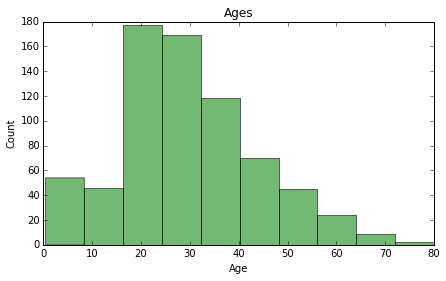

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

alpha_val = 0.55

sz_age = df[ df[ 'Age' ].notnull() ][ 'Age' ]    # Age만 별도 추출
    
fig_age = plt.figure( figsize = (7,4) )    # fig size 정의
ax_age = plt.subplot2grid( (1,1), (0,0) )    # 표현 data
plt.hist( x = sz_age, normed = False, facecolor = 'green', alpha = alpha_val )    # hist 설정
plt.xlabel( 'Age' ); plt.ylabel( 'Count' ); plt.title( 'Ages' )

##<font color='red'>Training dataset에서 크게 누락발생되는 Age를 복원하기 위한 다양한 Case가 존재</font>

In [8]:
df_test = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.

# Case 1 : Trainig/ Test를 누락값 보완으로 활용
mean_age_sub0 = ( df[ 'Age' ][ df[ 'SibSp' ] == 0 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 0 ].mean() )/2.0
mean_age_sub1 = ( df[ 'Age' ][ df[ 'SibSp' ] == 1 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 1 ].mean() )/2.0
mean_age_sub2 = ( df[ 'Age' ][ df[ 'SibSp' ] == 2 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 2 ].mean() )/2.0
mean_age_sub3 = ( df[ 'Age' ][ df[ 'SibSp' ] == 3 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 3 ].mean() )/2.0
mean_age_sub4 = ( df[ 'Age' ][ df[ 'SibSp' ] == 4 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 4 ].mean() )/2.0
mean_age_sub5 = ( df[ 'Age' ][ df[ 'SibSp' ] == 5 ].mean() + df_test[ 'Age' ][ df_test[ 'SibSp' ] == 5 ].mean() )/2.0
mean_age_sub8 = df_test[ 'Age' ][ df_test[ 'SibSp' ] == 8 ].mean()

##Training data에서 Age를 보완하기 위해, SibSp Case별로 판단하여 복원

In [9]:
df[ 'Age' ].fillna( value = df[ 'Age' ].mean(), inplace = True )    # 누락된 Age에 평균 mean값 부여

Cabin은 누락도 상당히 많고, 객실번호를 통해 모델링이 가능할 것으로 볼 수 없다고 생각했으나,

누락분에 대해서는 CabinX로 일단 처리해두고, 이후에 labeling하여 분석모델에 feature로 참여시킨다

분석가능하지 않다고 판단되므로 제외한다.

In [10]:
df[ 'Cabin' ].fillna( value = 'cabin_X', inplace = True )

##3. Train data에 대한 탐색
###여기까지 기본적인 Cleansing 작업을 진행했다.
###이제, 각 Feature 측면을 확인해본다.

In [11]:
fig_survived_summary = plt.figure( figsize = (16.5,4) )    # fig size 정의

In [12]:
df[ 'Name' ] = df[ 'Name' ].str.split( ',' ).str[0]    # 

In [13]:
df.drop( [ 'PassengerId' ], axis = 1, inplace = True )    # PassengerId feature를 drop

In [14]:
sz_passender_id = df_test[ 'PassengerId' ]    # 답안제출 제공형식에는 PassenderId별 Survived가 제공되어야 하므로, 이를 백업

df_test.drop( [ 'PassengerId' ], axis = 1, inplace = True )
df_test[ 'Name' ] = df_test[ 'Name' ].str.split( ',' ).str[0]

###Categorical data의 Label Encoding 수행

In [15]:
df_test[ 'Cabin' ].fillna( 'cabin_X', inplace = True )

In [16]:
from sklearn import preprocessing

# Name : 이름정보 변경
le_name = preprocessing.LabelEncoder()    # Name 정보를 위한, label Encoder 생성
df[ 'Name' ] = le_name.fit_transform( df[ 'Name' ] )    # le를 fit/ transforming
df_test[ 'Name' ] = le_name.fit_transform( df_test[ 'Name' ] )    # le를 fit/ transforming

# Sex : 성별정보 변경
le_sex = preprocessing.LabelEncoder()    # Sex 정보를 위한, label Encoder 생성
df[ 'Sex' ] = le_sex.fit_transform( df[ 'Sex' ] )    # le를 fit/ transforming
df_test[ 'Sex' ] = le_sex.fit_transform( df_test[ 'Sex' ] )    # le를 fit/ transforming

# Ticket : Ticket정보 변경
le_ticket = preprocessing.LabelEncoder()    # Ticket 정보를 위한, Label Encoder 생성
df[ 'Ticket' ] = le_ticket.fit_transform( df[ 'Ticket' ] )    # le를 fit/ transforming
df_test[ 'Ticket' ] = le_ticket.fit_transform( df_test[ 'Ticket' ] )    # le를 fit/ transforming

# Cabin : Cabin정보 변경
le_cabin = preprocessing.LabelEncoder()    # Cabin 정보를 위한, Label Encoder 생성
df[ 'Cabin' ] = le_cabin.fit_transform( df[ 'Cabin' ] )    # le를 fit/ transforming
df_test[ 'Cabin' ] = le_cabin.fit_transform( df_test[ 'Cabin' ] )    # le를 fit/ transforming

# Embarked : 승선지정보 변경
le_embarked = preprocessing.LabelEncoder()    # Embarked 정보를 위한, Label Encoder 생성
df[ 'Embarked' ] = le_embarked.fit_transform( df[ 'Embarked' ] )    # le를 fit/ transforming
df_test[ 'Embarked' ] = le_embarked.fit_transform( df_test[ 'Embarked' ] )    # le를 fit/ transforming

df.head()
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,172,1,34.5,0,0,152,7.8292,76,1
1,3,339,0,47.0,1,0,221,7.0000,76,2
2,2,231,1,62.0,0,0,73,9.6875,76,1
3,3,344,1,27.0,0,0,147,8.6625,76,2
4,3,150,0,22.0,1,1,138,12.2875,76,2


##<font color = 'red'>**누락값을 항상 채워둔다**</font>

###Fare 누락값 처리
Fare에 누락이 있으므로, 이를 처리해야 한다.

Fare는 1개 누락이므로, Fare 누락값을 처리하기 위해 Training + test data를 통해 추정.

그 전에, 우선 각 Embarked별로 Pclass와 Fare간의 상관관계를 보자.

In [17]:
# test set내 1개 fare값을 보완하기 위한 
mean_fare_train = df[ 'Fare' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Embarked' ] == 0 ) &
                                ( df[ 'SibSp' ] == 0 ) & ( df[ 'Parch' ] == 0 ) ].mean()
mean_fare_test = df_test[ 'Fare' ][ ( df_test[ 'Pclass' ] == 3 ) & ( df_test[ 'Embarked' ] == 0 ) &
                                    ( df_test[ 'SibSp' ] == 0 ) & ( df_test[ 'Parch' ] == 0 ) ].mean()
mean_fare = (mean_fare_train + mean_fare_test)/2.0
idx = df_test[ df_test[ 'Fare' ].isnull() ].index.tolist()    # Fare == NaN인 dataset의 idx 정보
df_test.loc[ idx, 'Fare' ] = mean_fare    # 결측값 보완

###Age 누락값 처리
* 1건의 Fare 누락분은 채워넣었고, Age를 처리해야 한다. 추측컨데, 좌석등급 혹은 Embarked와 관련성 있는지 확인해본다.

* 단언은 곤란하나, 연령대가 높아짐에 따라 좌석등급은 높아지는 정도가 확인된다. 하지만, 60대 3등급은 희박하고, 10대 1등급도 희박하다.
* 나이분포의 특이성은 SibSp와 관련성이 있어 보이므로, SibSp별 mean Age를 확보하여 누락 Age에 채우도록 한다.
* 하지만, 각 좌석등급별 평균나이를 채우려면 귀찮으니, 전체 평균을 누락된 Age에 채우도록 한다.
* Fare 비용이 높은 경우, 생존률이 높아보인다

In [18]:
df[ 'Fare' ] = df[ 'Fare' ]/( df[ 'SibSp' ] + df[ 'Parch' ] + 1 )    # 인당 Fare로 변환하여 사용한다.
df_test[ 'Fare' ] = df_test[ 'Fare' ]/( df_test[ 'SibSp' ] + df_test[ 'Parch' ] + 1 )    # 인당 Fare로 변환하여 사용한다.

In [19]:
df_test[ 'Age' ].fillna( value = df_test[ 'Age' ].mean(), inplace = True )    # 누락된 Age에 평균 mean값 부여


Train, Test data의 SibSp, Parch가 존재하는 경우, SibSp를 가족승객 여부로 활용한다

###<font color='blue'>Test dataset에 대한 누락분은 모두 해결했다</font>

###Training dataset과 실제 dataset의 구조가 동일한지 확인하는 validation code

##6. Predict modeling

###Training dataset을 X와 y로 분리

##<font color='red'>Training시 사용할 Feature 선별의 Case들</font>

In [20]:
list_for_drop = [
#                   'Name',
#                   'Age',
#                   'SibSp',
#                   'Parch',
#                   'Ticket',
#                   'Fare',
                  'Cabin',
#                   'Embarked'
                ]    # training, test 모두에게서 drop features
list_for_train = list( list_for_drop )
list_for_test = list( list_for_drop )

list_for_train.append( 'Survived' )
# list_for_test.append( 'Cabin' )

X = df.drop( list_for_train, axis = 1 )    # X를 확보
y = df[ 'Survived' ]    # y를 확보

cv_cnt = 30
n_jobs_cnt = 8

In [21]:
# X.head( 3 )
n_jobs_cnt = 8

##0. Decision Tree 수행

In [22]:
%%time
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import grid_search

params = {
           'criterion' : ('gini','entropy'),
           'splitter' : ('best', 'random'),
           'max_depth' : (7,10,20),
           'min_samples_split' : (2,4,8),
           'random_state' : (1,2,3),
         }
gs = grid_search.GridSearchCV( DecisionTreeClassifier( class_weight = 'auto' ),
                               param_grid = params, n_jobs = n_jobs_cnt, cv = cv_cnt,
                               
                             )    # GridSearch 생성
gs.fit( X, y )    # fitting

#                   'SibSp',
#                   'Parch',
#                   'Ticket',
#                   'Fare',

print( gs.best_score_ )
# gs.grid_scores_

0.820426487093
Wall time: 9.87 s


###1. LinearSVC 수행 : 최적 C값 적용 : cross-validation 활용

In [23]:
# from sklearn import svm
# from sklearn import cross_validation

# params = { 'C' : (0.1, 0.5, 1.0, 1.5, 2.0) }

# gs = grid_search.GridSearchCV( svm.LinearSVC(), param_grid = params, n_jobs = n_jobs_cnt, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print( gs.best_score_ )
# # gs.grid_scores_

###3. KNN 수행 : 최적 neighbor수, weight값 활용

In [24]:
# from sklearn.neighbors import KNeighborsClassifier

# params = { 'n_neighbors' : (1, 3, 5, 7, 10), 'weights' : ('uniform', 'distance') }

# gs = grid_search.GridSearchCV( KNeighborsClassifier(), param_grid = params, n_jobs = n_jobs_cnt, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print( gs.best_score_ )
# # gs.grid_scores_

###4. Ensemble 수행 : RandomForestClassifier

In [25]:
# %%time
# # 0.841750841751 확보 parameter set grid
# from sklearn.ensemble import RandomForestClassifier

# params = { 
#            'n_estimators' : (15,20),
#            'criterion' : ('gini','entropy'),
# #            'max_features' : ('auto','sqrt',None),
#            'max_depth' : (3,5,9,11,None),
#            'min_samples_split' : (3,5,7),
# #            'min_samples_leaf' : (1,3,5),
# #            'min_weight_fraction_leaf' : (0.0,0.3,0.5),
#            'bootstrap' : (True, False),
#            'random_state' : (1,2,3,4),
# #            'warm_start' : (True,False)
#          }

# gs = grid_search.GridSearchCV( RandomForestClassifier( n_estimators = 100, class_weight = 'auto' ),
#                                param_grid = params, n_jobs = n_jobs_cnt, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print( gs.best_score_ )
# # gs.grid_scores_

###5. LogisticRegression 수행

In [26]:
# from sklearn.linear_model import LogisticRegression

# params = { 'C' : (.1,.3,.5,.7,1.0) }
# gs = grid_search.GridSearchCV( LogisticRegression(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# # gs.grid_scores_

##6. AdaBoostClassifier 수행

In [27]:
# from sklearn.ensemble import AdaBoostClassifier

# params = { 'n_estimators' : (10,30,50,100) }
# gs = grid_search.GridSearchCV( AdaBoostClassifier(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# # gs.grid_scores_

##7. BaggingClassifier 수행

In [28]:
# from sklearn.ensemble import BaggingClassifier

# params = { 'n_estimators' : (1,3,5,10,20,30,500), 'max_samples' : (20,30,40) }
# gs = grid_search.GridSearchCV( BaggingClassifier(), param_grid = params, cv = cv_cnt )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# # gs.grid_scores_
# # gs

###6. 실제 prediction을 수행한다.

In [29]:
# X.head(1)

In [30]:
# df_test.head( 3 )

In [31]:
# df_test.drop( [ 'SibSp', 'Parch', 'Embarked' ], axis = 1, inplace = True )
# df_test.drop( [ 'SibSp', 'Parch', 'Age' ], axis = 1, inplace = True )
df_test.drop( list_for_test, axis = 1, inplace = True )

In [32]:
df_test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,172,1,34.5,0,0,152,7.8292,1


In [33]:
# df_test.head( 1 )
# gs.best_estimator_

In [34]:
# y_pred = gs.predict( df_test )    # decisionTreeClassifier인 경우 prediction 수행
y_pred = gs.best_estimator_.predict( df_test )    # prediction 수행

df_result = pd.DataFrame( sz_passender_id, columns = [ 'PassengerId' ] )    # 결과를 새로운 dataframe에 담는다
df_result[ 'Survived' ] = y_pred
df_result.to_csv( path_or_buf = 'result.csv', sep = ',', index = False )

In [35]:
# df = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.
# df[ 'Survived' ] = y_pred
# df.to_csv( path_or_buf = 'check.csv', sep = ',', index = False )
# # df_check.head()    # 대략적 내용을 파악한다.

##<font color='red'>7. prediction 결과를 분석한다 : 과연 training data와 유사한 결과를 보이는지</font>

###이제, 각 Feature 측면을 확인해본다.

In [36]:
# fig_survived_summary = plt.figure( figsize = (15,4) )    # fig size 정의

# # Surveved의 기본확인
# sz_survived_summary = df[ 'Survived' ].value_counts()    # Survived의 생존여부별로 groupby하여 결과수치를 확인한다.
# sz_survived_summary_tweaked = sz_survived_summary.rename( index = { 0 : 'Die', 1 : 'Alive' } )    # index를 가시적으로 변경
# ax_survived_summary = plt.subplot2grid( (1,5), (0,0) )    # 표현 data의 위치
# sz_survived_summary_tweaked.plot( kind = 'bar', ax = ax_survived_summary, alpha = alpha_val )
# plt.xlabel( 'Survived' ); plt.ylabel( 'Count' ); plt.title( 'Survived Count' )
# print 'Survived Alive : ', sz_survived_summary.ix[ 1 ], 'Died : ', sz_survived_summary.ix[ 0 ], 'Alive % : ', np.float( sz_survived_summary.ix[1] )/np.float( sz_survived_summary.sum() )

# # P Class의 기본확인
# sz_pclass_summary = df[ 'Pclass' ].value_counts()    # Pclass를 groupby하여 결과수치를 확인한다.
# sz_pclass_summary.rename( index = { 1 : '1st', 2 : '2nd', 3 : '3rd' }, inplace = True )
# ax_pclass_summary = plt.subplot2grid( (1,5), (0,1) )    # 표현 data의 위치
# sz_pclass_summary.sort_index( ascending = True ).plot( kind = 'bar', ax = ax_pclass_summary, alpha = alpha_val )
# plt.xlabel( 'Ticket Class' ); plt.ylabel( 'Count' ); plt.title( 'Ticket Class Count' )
# print 'Class 1st : ', sz_pclass_summary.ix[ '1st' ], '2nd : ', sz_pclass_summary.ix[ '2nd' ], '3rd : ', sz_pclass_summary.ix[ '3rd' ]

# # Embarked의 기본확인
# sz_embarked_summary = df[ 'Embarked' ].value_counts()    # Embarked 정보별로 groupby하여 결과수치를 확인한다.
# sz_embarked_summary.rename( index = { 'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton' }, inplace = True )
# ax_embarked_summary = plt.subplot2grid( (1,5), (0,2) )    # 표현 data의 위치
# sz_embarked_summary.plot( kind = 'bar', ax = ax_embarked_summary, alpha = alpha_val )
# plt.xlabel( 'Embarked' ); plt.ylabel( 'Count' ); plt.title( 'Embarked Count' )
# print 'Embarked Cherbourg : ', sz_embarked_summary.ix[ 'Cherbourg' ], 'Queenstown : ', sz_embarked_summary.ix[ 'Queenstown' ], 'Southampton : ', sz_embarked_summary.ix[ 'Southampton' ]

# # Gender의 기본확인
# sz_gender_summary = df[ 'Sex' ].value_counts()    # Sex 성별별로 groupby하여 결과수치를 확인한다.
# ax_gender_summary = plt.subplot2grid( (1,5), (0,3) )    # 표현 data의 위치
# sz_gender_summary.plot( kind = 'bar', ax = ax_gender_summary, alpha = alpha_val )
# plt.xlabel( 'Sex' ); plt.ylabel( 'Count' ); plt.title( 'Sex Count' )
# print 'Sex male : ', sz_gender_summary.ix[ 'male' ], 'female : ', sz_gender_summary.ix[ 'female' ]

# # 연령대의 기본확인
# sz_survived = df[ 'Survived' ]
# sz_survived_tweaked = sz_survived.replace( to_replace = { 0 : 'Die', 1 : 'Alive' } )
# sz_age = df[ 'Age' ]
# ax_survived_summary = plt.subplot2grid( (1,5), (0,4) )    # 표현 data의 위치
# plt.scatter( x = sz_survived, y = sz_age, alpha = alpha_val )
# plt.xlabel( 'Survived, 0 : Die, 1 : Alive' ); plt.ylabel( 'Age' ); plt.title( 'Age by Survived' )

##성별에 따른, 생존자수 분석

In [37]:
# # 남녀 각각의 생존률을 기반으로 분석한다
# fig_sur_prop_by_gen = plt.figure( figsize = (15,7) )    # fig size 정의
# # 남자
# ax_sur_prop_by_male = plt.subplot2grid( (2,2), (1,0) )    # 표현 data의 위치
# sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
# sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,0.8]), ax = ax_sur_prop_by_male )
# plt.title( 'Survived % : Male' ); plt.legend( loc = 'best' )
# print 'Male Alive % : ', ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

# # 여자
# ax_sur_prop_by_female = plt.subplot2grid( (2,2), (1,1) )    # 표현 data의 위치
# sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
# sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'female', xlim = ([0,0.8]), ax = ax_sur_prop_by_female, color = 'red' )
# plt.title( 'Survived % : Female' ); plt.legend( loc = 'best' )
# print 'Female Alive % : ', ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

##좌석등급에 따른, 생존률 분석

In [38]:
# # 좌석등급 생존자수를 기반으로 분석한다
# fig_sur_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# # 1등급
# sz_survived_pclass1_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 1 ] ).value_counts()    # 1등급 좌석 생존 요약
# ax_sur_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
# sz_survived_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_survived_pclass1_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class1 )
# plt.title( 'Survived : 1st' )
# print sz_survived_pclass1_summary

# # 2등급
# sz_survived_pclass2_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 2 ] ).value_counts()    # 2등급 좌석 생존 요약
# ax_sur_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
# sz_survived_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_survived_pclass2_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd', ylim = ([0,300]), ax = ax_sur_by_class2, color = 'pink' )
# plt.title( 'Survived : 2nd' )
# print sz_survived_pclass2_summary

# # 3등급http://localhost:8888/notebooks/15.06.08.01.kaggle.titanic/15.06.12.01.kaggle.Machine%20Learning%20from%20Disaster.ipynb#
# sz_survived_pclass3_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 3 ] ).value_counts()    # 2등급 좌석 생존 요약
# ax_sur_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
# sz_survived_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_survived_pclass3_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class3, color = 'black' )
# plt.title( 'Survived : 3rd' )
# print sz_survived_pclass3_summary

##좌석등급/ 성별구분 분석

In [39]:
# # 좌석등급별 성별따른 각각의 생존률을 기반으로 분석한다
# fig_pclass1 = plt.figure( figsize = (15,4) )    # fig size 정의

# # 1등급, 여자
# sz_pclass1_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'female' ) ]    # 1등급, 여자
# sz_pclass1_f_summary = sz_pclass1_f.value_counts()/( np.float( sz_pclass1_f.size ) )    # groupby후 %
# sz_pclass1_f_summary
# ax_pclass1_f = plt.subplot2grid( (1,6), (0,0) )    # 표현 data의 위치
# sz_pclass1_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass1_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ female', ylim = ([0,1]), ax = ax_pclass1_f, color = 'red' )
# plt.title( '1st Female' )
# try :
#     print '1st Female : ', sz_pclass1_f_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 1등급, 남자
# sz_pclass1_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'male' ) ]    # 1등급, 남자
# sz_pclass1_m_summary = sz_pclass1_m.value_counts()/( np.float( sz_pclass1_m.size ) )    # groupby후 %
# ax_pclass1_m = plt.subplot2grid( (1,6), (0,1) )    # 표현 data의 위치
# sz_pclass1_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass1_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ male', ylim = ([0,1]), ax = ax_pclass1_m )
# plt.title( '1st male' )
# sz_pclass1_m_summary
# try :
#     print '1st Male : ', sz_pclass1_m_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 2등급, 여자
# sz_pclass2_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'female' ) ]    # 2등급, 여자
# sz_pclass2_f_summary = sz_pclass2_f.value_counts()/( np.float( sz_pclass2_f.size ) )    # groupby후 %
# sz_pclass2_f_summary
# sz_pclass2_f = plt.subplot2grid( (1,6), (0,2) )    # 표현 data의 위치
# sz_pclass2_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass2_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ female', ylim = ([0,1]), ax = sz_pclass2_f, color = 'red' )
# plt.title( '2nd Female' )
# try :
#     print '2nd Female : ', sz_pclass2_f_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 2등급, 남자
# sz_pclass2_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'male' ) ]    # 2등급, 남자
# sz_pclass2_m_summary = sz_pclass2_m.value_counts()/( np.float( sz_pclass2_m.size ) )    # groupby후 %
# ax_pclass2_m = plt.subplot2grid( (1,6), (0,3) )    # 표현 data의 위치
# sz_pclass2_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass2_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass2_m )
# plt.title( '2nd male' )
# try :
#     print '2nd Male : ', sz_pclass2_m_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 3등급, 여자
# sz_pclass3_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'female' ) ]    # 3등급, 여자
# sz_pclass3_f_summary = sz_pclass3_f.value_counts()/( np.float( sz_pclass3_f.size ) )    # groupby후 %
# sz_pclass3_f_summary
# sz_pclass3_f = plt.subplot2grid( (1,6), (0,4) )    # 표현 data의 위치
# sz_pclass3_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass3_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '3rd w/ female', ylim = ([0,1]), ax = sz_pclass3_f, color = 'red' )
# plt.title( '3rd Female' )
# try :
#     print '3rd Female : ', sz_pclass3_f_summary.ix[ 'Alive' ]
# except :
#     print '0'

# # 3등급, 남자
# sz_pclass3_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'male' ) ]    # 3등급, 남자
# sz_pclass3_m_summary = sz_pclass3_m.value_counts()/( np.float( sz_pclass3_m.size ) )    # groupby후 %
# ax_pclass3_m = plt.subplot2grid( (1,6), (0,5) )    # 표현 data의 위치
# sz_pclass3_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
# sz_pclass3_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass3_m )
# plt.title( '3rd male' )
# try :
#     print '3rd Male : ', sz_pclass3_m_summary.ix[ 'Alive' ]
# except :
#     print '0'